In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
from statsmodels.api import qqplot
import statsmodels.api as sm
import itertools
from statsmodels.tsa.ar_model import AutoReg

## **Time series data**

In [2]:
ticker = "SUZLON.NS"

end_date = datetime.today()
start_date = end_date - timedelta(days=10*256)

data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
print()
print(data)

[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open     Volume
Ticker      SUZLON.NS  SUZLON.NS  SUZLON.NS  SUZLON.NS  SUZLON.NS
Date                                                             
2018-07-26   7.162068   7.529354   7.070247   7.437533  105574671
2018-07-27   7.070247   7.345711   7.024336   7.253890   24277154
2018-07-30   7.345711   7.575265   7.070247   7.116158   48217639
2018-07-31   7.162068   7.391622   7.116158   7.391622   28097038
2018-08-01   7.070247   7.299801   6.978426   7.207979   26863252
...               ...        ...        ...        ...        ...
2025-07-22  66.580002  66.779999  65.699997  66.680000   35735857
2025-07-23  65.980003  66.440002  65.519997  66.099998   32844030
2025-07-24  65.320000  66.239998  65.050003  65.980003   25857103
2025-07-25  63.619999  65.320000  62.830002  65.300003   55135489
2025-07-28  60.849998  63.549999  60.650002  63.500000   63833967

[1728 rows x 5 columns]


In [3]:
print(data.shape)

(1728, 5)


In [4]:
print(data['Close'].loc['2025-07-14'])

Ticker
SUZLON.NS    65.440002
Name: 2025-07-14 00:00:00, dtype: float64


## **Line plot**

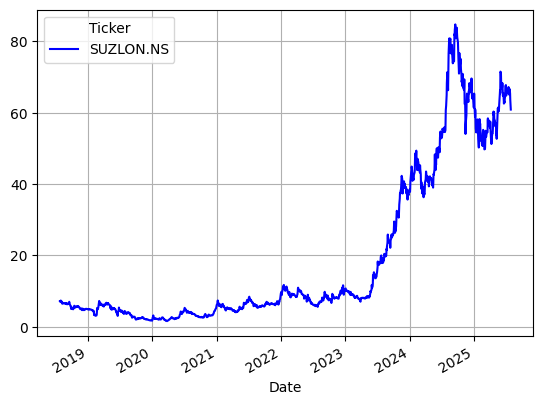

In [5]:
data['Close'].plot(color='blue')
plt.grid()
plt.show()

## **Histogram & density plots**

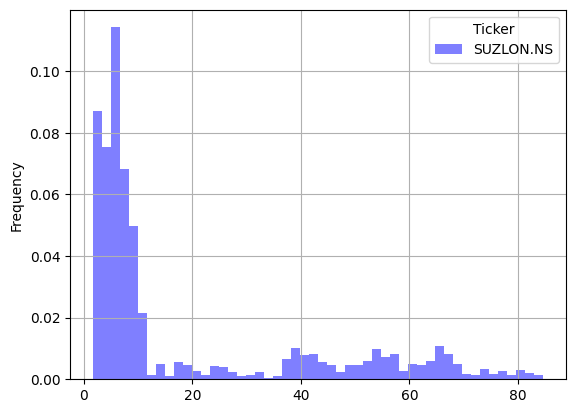

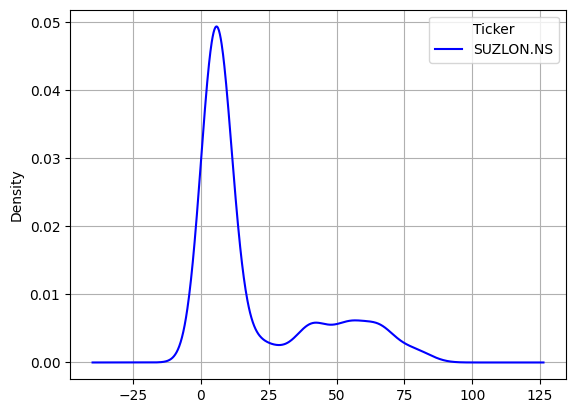

In [6]:
data['Close'].plot(kind='hist',
                   bins=50,
                   density=True,
                   color='blue',
                   alpha=0.5)
plt.grid()
plt.show()

data['Close'].plot(kind='kde',
                   color = 'blue')
plt.grid()
plt.show()

## **Box plot**

In [7]:
X = data['Close'].copy()
X['Year'] = X.index.year
display(X.head())

Ticker,SUZLON.NS,Year
Date,,
2018-07-26,7.162068,2018
2018-07-27,7.070247,2018
2018-07-30,7.345711,2018
2018-07-31,7.162068,2018
2018-08-01,7.070247,2018


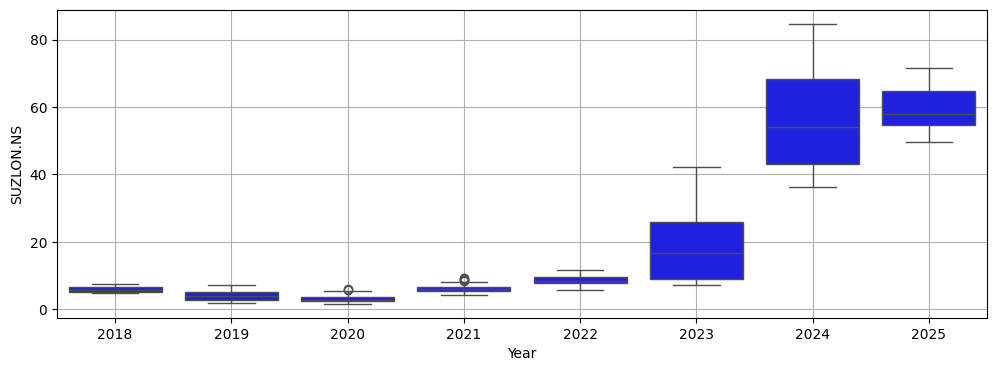

In [8]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='Year', y='SUZLON.NS', data=X, color='blue')
plt.grid()
plt.show()

## **Statistics**

In [9]:
pd.options.display.float_format = '{:.2f}'.format
data['Close'].describe()

Ticker,SUZLON.NS
count,1728.00
mean,19.09
std,22.47
min,1.61
25%,4.82
50%,7.12
75%,31.65
max,84.70


In [10]:
data['Close'].isnull().sum()

,0
Ticker,
SUZLON.NS,0


## **Log transformation**

In [11]:
data_log = np.log(data['Close'])
print(data['Close'].head())
print()
print((data_log).head())

Ticker      SUZLON.NS
Date                 
2018-07-26       7.16
2018-07-27       7.07
2018-07-30       7.35
2018-07-31       7.16
2018-08-01       7.07

Ticker      SUZLON.NS
Date                 
2018-07-26       1.97
2018-07-27       1.96
2018-07-30       1.99
2018-07-31       1.97
2018-08-01       1.96


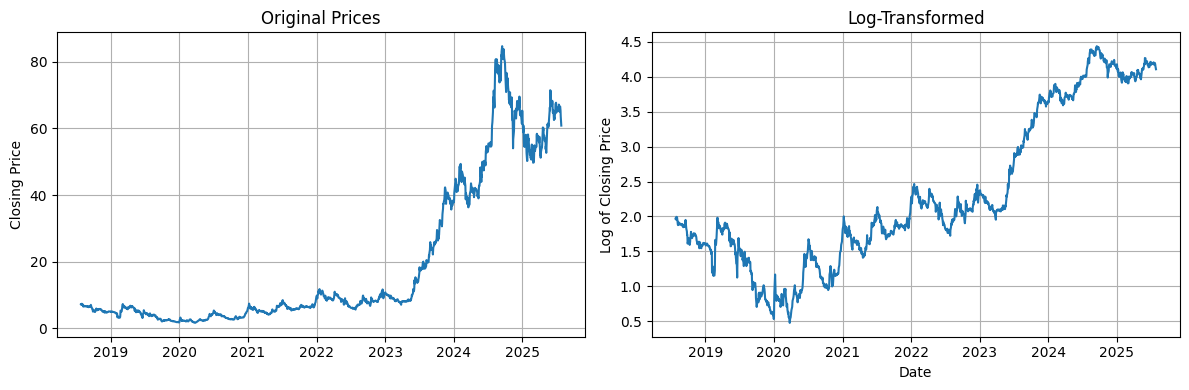

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(data['Close'])
axes[0].set_title('Original Prices')
axes[0].set_ylabel('Closing Price')
axes[0].grid(True)

axes[1].plot(data_log)
axes[1].set_title('Log-Transformed')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Log of Closing Price')
axes[1].grid(True)

plt.tight_layout()
plt.show()

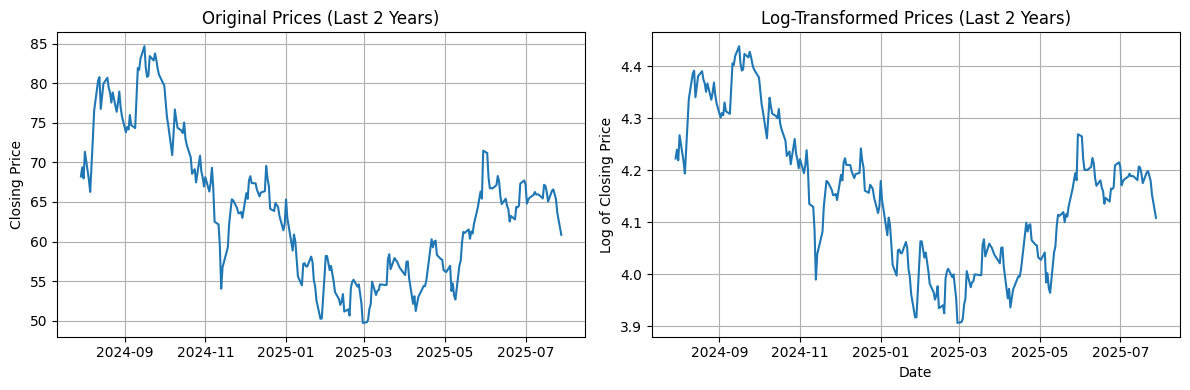

In [13]:
end_date = datetime.today()
start_date_2_years = end_date - timedelta(days=1*365)

data_2_years = data[data.index >= start_date_2_years]
data_log_2_years = data_log[data_log.index >= start_date_2_years]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(data_2_years['Close'])
axes[0].set_title('Original Prices (Last 2 Years)')
axes[0].set_ylabel('Closing Price')
axes[0].grid(True)

axes[1].plot(data_log_2_years)
axes[1].set_title('Log-Transformed Prices (Last 2 Years)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Log of Closing Price')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## **50-day moving average**

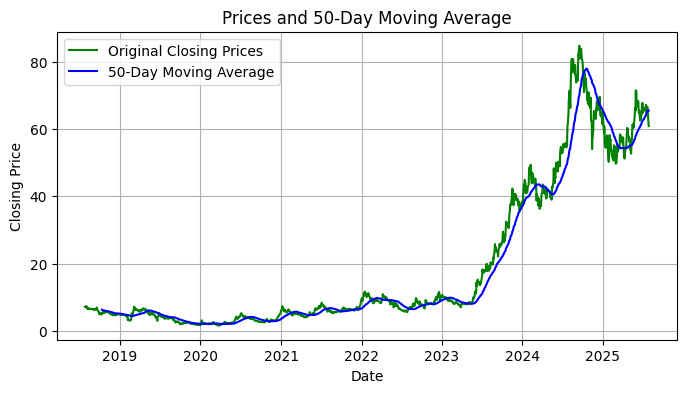

In [14]:
ma_20 = data['Close'].rolling(window=50).mean()

plt.figure(figsize=(8, 4))
plt.plot(data['Close'], label='Original Closing Prices', color ='green')
plt.plot(ma_20, label='50-Day Moving Average', color='blue')
plt.title('Prices and 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
print(ma_20)

Ticker      SUZLON.NS
Date                 
2018-07-26        NaN
2018-07-27        NaN
2018-07-30        NaN
2018-07-31        NaN
2018-08-01        NaN
...               ...
2025-07-22      65.24
2025-07-23      65.36
2025-07-24      65.44
2025-07-25      65.50
2025-07-28      65.48

[1728 rows x 1 columns]


## **Lagged dataset**

In [16]:
values = data['Close'].copy()
dataframe = pd.concat([values.shift(1), values.shift(2), values.shift(3), values], axis=1)
dataframe.columns = ['t', 't+1', 't+2', 't+3']
dataframe.head(5)

,t,t+1,t+2,t+3
Date,,,,
2018-07-26,NaN,NaN,NaN,7.16
2018-07-27,7.16,NaN,NaN,7.07
2018-07-30,7.07,7.16,NaN,7.35
2018-07-31,7.35,7.07,7.16,7.16
2018-08-01,7.16,7.35,7.07,7.07


In [17]:
dataframe.tail()

,t,t+1,t+2,t+3
Date,,,,
2025-07-22,66.42,65.06,66.26,66.58
2025-07-23,66.58,66.42,65.06,65.98
2025-07-24,65.98,66.58,66.42,65.32
2025-07-25,65.32,65.98,66.58,63.62
2025-07-28,63.62,65.32,65.98,60.85


## **Auto correlation**

In [18]:
X = np.log(data['Close']).diff().dropna()
df = pd.concat([X.shift(1), X.shift(2), X], axis=1)
df.columns = ['t-1', 't-2', 't']
df.corr()

,t-1,t-2,t
t-1,1.00,0.19,0.19
t-2,0.19,1.00,-0.00
t,0.19,-0.00,1.00


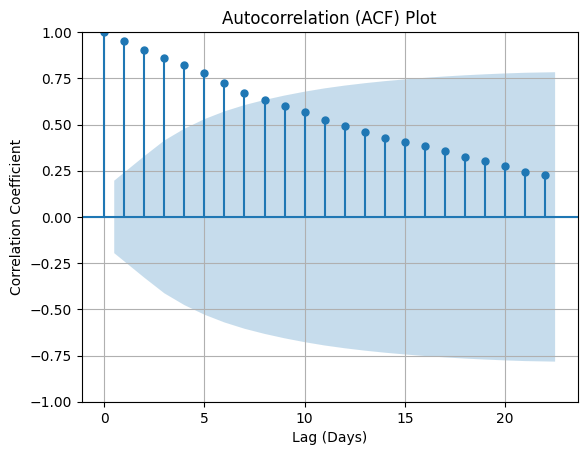

In [19]:
plot_acf(data['Close'][:100], lags=22, alpha=0.05, title='Autocorrelation (ACF) Plot')
plt.xlabel('Lag (Days)')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()

## **Stationarity Test: ADF**

In [20]:
result = adfuller(data['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.123431
p-value: 0.967625
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


## **Plot-LogDifferenced series**

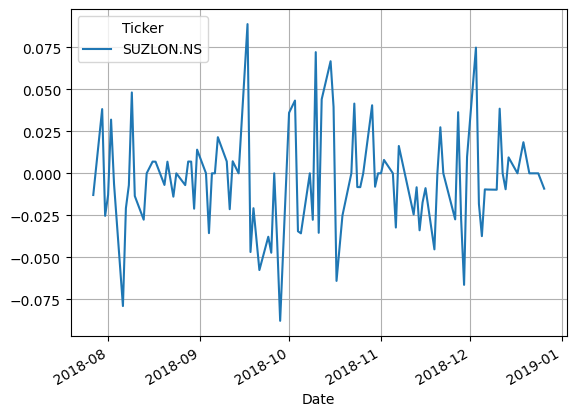

In [21]:
X[:100].plot()
plt.grid()
plt.show()

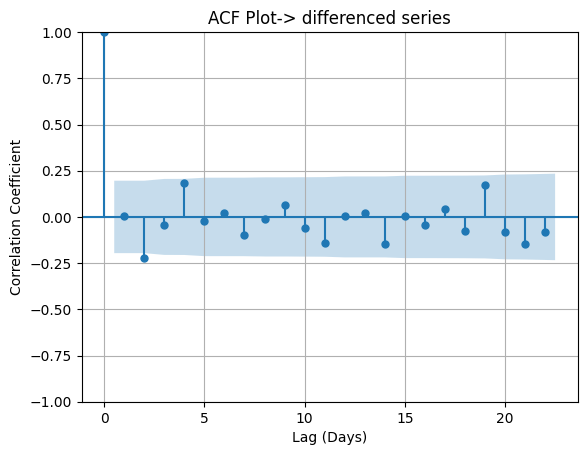

In [22]:
plot_acf(X[:100], lags=22, title='ACF Plot-> differenced series')
plt.xlabel('Lag (Days)')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()

In [23]:
result = adfuller(np.log(data['Close']).diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.263274
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


# **Persistence algorithm on entire dataset**

predict=7.162068 <-> actual=7.299801
predict=7.189615 <-> actual=7.253890
predict=7.226343 <-> actual=6.702961
predict=7.097793 <-> actual=6.565229
predict=6.978426 <-> actual=6.519319
predict=6.868240 <-> actual=6.840694
predict=6.776419 <-> actual=6.748872
predict=6.675415 <-> actual=6.565229
predict=6.647869 <-> actual=6.565229
predict=6.647869 <-> actual=6.611140
predict=6.666233 <-> actual=6.657051
predict=6.629504 <-> actual=6.611140
predict=6.601958 <-> actual=6.657051
predict=6.620322 <-> actual=6.565229
predict=6.620322 <-> actual=6.565229
predict=6.611140 <-> actual=6.519319
predict=6.583594 <-> actual=6.565229
predict=6.574411 <-> actual=6.611140
predict=6.565229 <-> actual=6.473408
predict=6.546865 <-> actual=6.565229
predict=6.546865 <-> actual=6.565229
predict=6.556047 <-> actual=6.335676
predict=6.510136 <-> actual=6.335676
predict=6.455044 <-> actual=6.335676
predict=6.427497 <-> actual=6.473408
predict=6.409133 <-> actual=6.519319
predict=6.399951 <-> actual=6.381587
p

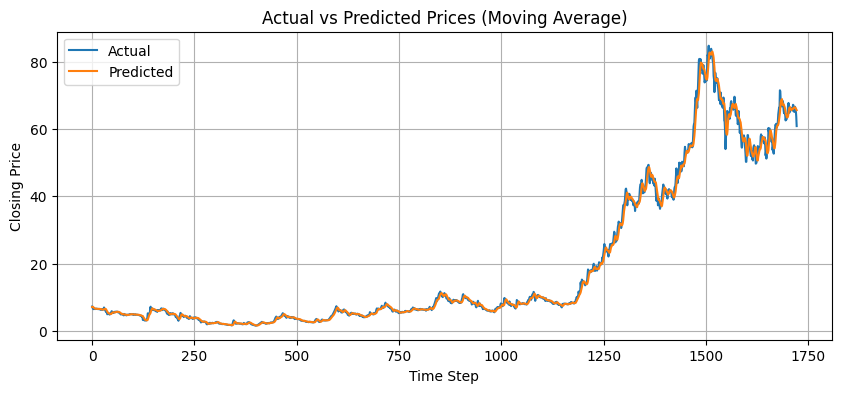

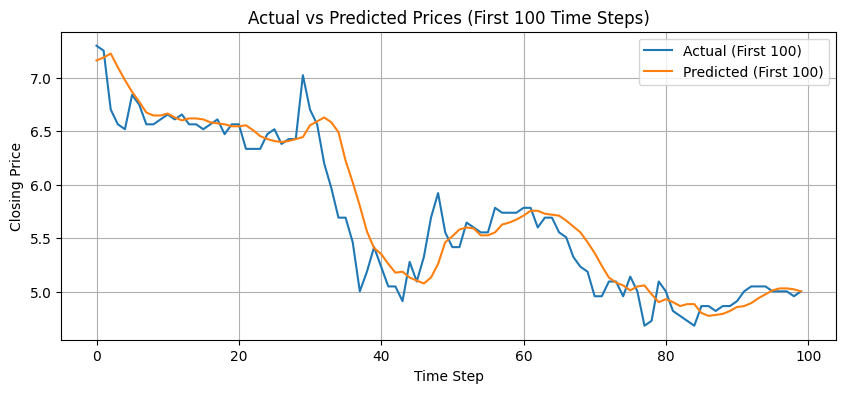

In [24]:
X = data['Close'].values
window = 5
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predict=%.6f <-> actual=%.6f' % (float(yhat), float(obs) if np.ndim(obs) == 0 else float(obs[0])))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

plt.figure(figsize=(10, 4))
plt.plot(range(len(test)), test, label='Actual')
plt.plot(range(len(predictions)), predictions, label='Predicted')
plt.title('Actual vs Predicted Prices (Moving Average)')
plt.xlabel('Time Step')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(range(100), test[:100], label='Actual (First 100)')
plt.plot(range(100), predictions[:100], label='Predicted (First 100)')
plt.title('Actual vs Predicted Prices (First 100 Time Steps)')
plt.xlabel('Time Step')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()

## **Persistence model with train/test**

In [25]:
X = dataframe.values
train_size = int(len(X) * 0.80)
train, test = X[1:train_size], X[train_size:]
Xtrain, ytrain = train[:,0], train[:,1]
Xtest, ytest = test[:,0], test[:,1]
print(Xtrain.shape, Xtest.shape)

(1381,) (346,)


In [26]:
def model_persistence(x):
    return x
predictions = list()
for x in Xtest:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(ytest, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.663


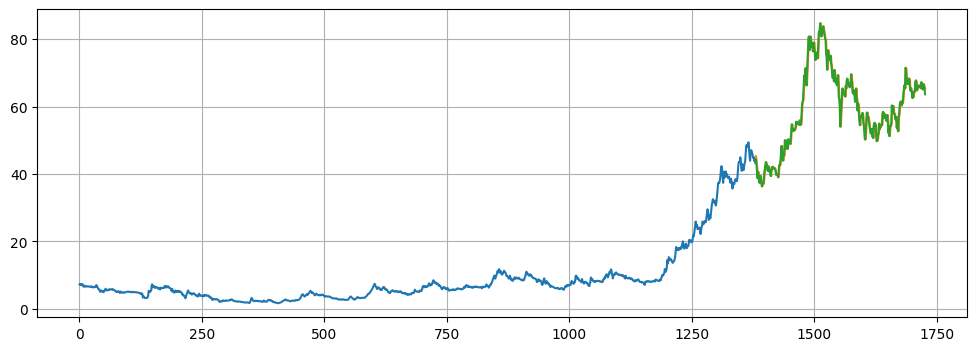

In [27]:
plt.figure(figsize=(12, 4))
plt.plot(ytrain)
plt.plot([None for i in ytrain] + [x for x in ytest])
plt.plot([None for i in ytrain] + [x for x in predictions])
plt.grid()
plt.show()

## **Persistence model**

Test RMSE: 1.303253049990279


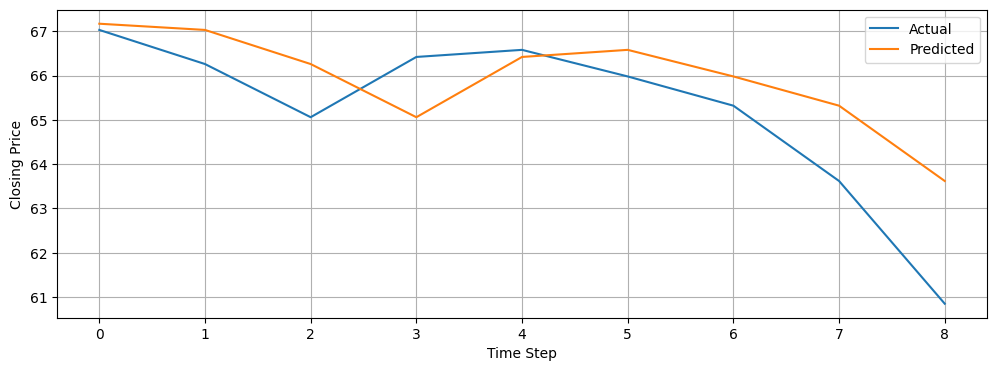

In [28]:
Z = data['Close'].values
train, test = Z[0:len(Z)-10], Z[len(Z)-10:]
Xtrain, ytrain = train[:-1], train[1:]
Xtest, ytest = test[:-1], test[1:]

def model_persistence(z):
    return z

predictions = list()
for z in Xtest:
    yhat = model_persistence(z)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(ytest, predictions))
print('Test RMSE:', rmse)

plt.figure(figsize=(12, 4))
plt.plot(ytest)
plt.plot(predictions)
plt.legend(['Actual', 'Predicted'])
plt.xlabel('Time Step')
plt.ylabel('Closing Price')
plt.grid()
plt.show()

## **AR Model**

Lag: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Coefficients: [ 0.02533019  1.11877404 -0.16518197  0.03136256  0.00405056 -0.03544366
  0.0164253   0.06451063 -0.12598942  0.18935105 -0.0323173  -0.04967471
 -0.01027045  0.00529249 -0.00709378 -0.00351589]
predict=65.122666 <=> actual=67.169998
predict=65.056900 <=> actual=67.029999
predict=65.134946 <=> actual=66.260002
predict=65.198354 <=> actual=65.059998
predict=65.343821 <=> actual=66.419998
predict=65.423168 <=> actual=66.580002
predict=65.462663 <=> actual=65.980003
predict=65.534594 <=> actual=65.320000
predict=65.557534 <=> actual=63.619999
predict=65.534064 <=> actual=60.849998
Test RMSE: 1.946


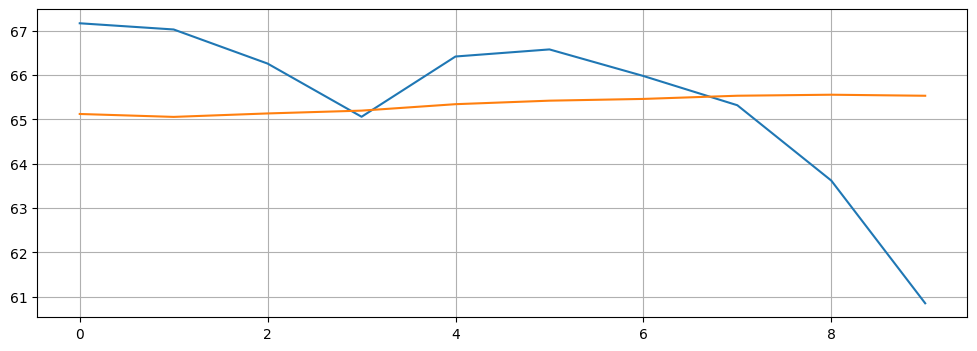

In [29]:
model = AutoReg(train, lags=15)
model_fit = model.fit()
print('Lag: %s' % model_fit.ar_lags)
print('Coefficients: %s' % model_fit.params)

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predict=%f <=> actual=%f' % (predictions[i], test[i].item()))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

plt.figure(figsize=(12, 4))
plt.plot(test)
plt.plot(predictions)
plt.grid()
plt.show()

# **AR - Residual Error**

In [30]:
X = np.log(data['Close']).diff().dropna()
df = pd.concat([X.shift(1), X.shift(2), X], axis=1)
df.columns = ['t-1', 't-2', 't']
df.dropna(inplace=True)
X = df.values
train_size = int(len(X) * 0.80)
train, test = X[1:train_size], X[train_size:]
X_train, y_train = train[:,0], train[:,1]
X_test, y_test = test[:,0], test[:,1]

## **Persistence model on training set**

In [31]:
train_pred = [x for x in X_train]
train_resid = [y_train[i]-train_pred[i] for i in range(len(train_pred))]
train_resid = np.array(train_resid)

## **AR Model training set**

In [32]:
model = AutoReg(train_resid, lags=15)
model_fit = model.fit()
window = int(model_fit.ar_lags[0])
coef = model_fit.params
print('Lags used: %s' % model_fit.ar_lags)
print('Coefficients: %s' % coef)

Lags used: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Coefficients: [ 7.77593818e-06 -7.17041001e-01 -7.04894746e-01 -6.54721762e-01
 -6.21204895e-01 -5.95726853e-01 -4.95029637e-01 -4.88689301e-01
 -4.25276301e-01 -4.01693913e-01 -2.69165814e-01 -2.26970144e-01
 -2.64310651e-01 -1.52753569e-01 -8.25904754e-02 -5.24732047e-02]


predicted error=-0.048450 -> expected error=0.013229
predicted error=-0.009478 -> expected error=0.015863
predicted error=-0.011367 -> expected error=0.000079
predicted error=-0.000049 -> expected error=-0.098317
predicted error=0.070505 -> expected error=0.079201
predicted error=-0.056782 -> expected error=-0.030001
predicted error=0.021519 -> expected error=0.049620
predicted error=-0.035572 -> expected error=-0.095402
predicted error=0.068415 -> expected error=0.035587
predicted error=-0.025510 -> expected error=0.030733
predicted error=-0.022029 -> expected error=0.015182
predicted error=-0.010879 -> expected error=-0.013846
predicted error=0.009936 -> expected error=-0.050322
predicted error=0.036090 -> expected error=0.025836
predicted error=-0.018518 -> expected error=0.008056
predicted error=-0.005768 -> expected error=-0.043757
predicted error=0.031384 -> expected error=-0.011130
predicted error=0.007989 -> expected error=0.024929
predicted error=-0.017867 -> expected error=-0

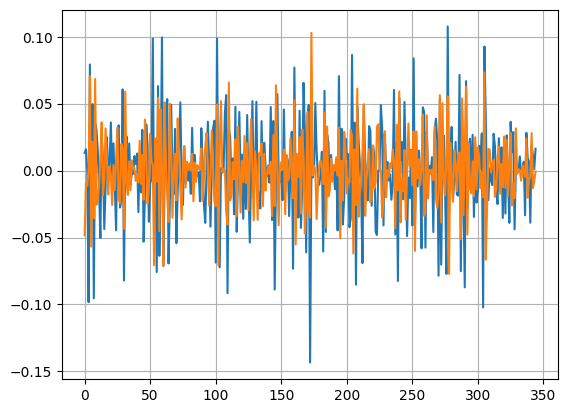

In [33]:
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(y_test)):
    yhat = X_test[t]
    error = y_test[t] - yhat
    expected_error.append(error)

    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    predictions.append(pred_error)
    history.append(error)
    print('predicted error=%f -> expected error=%f' % (pred_error, error))

rmse = sqrt(mean_squared_error(expected_error, predictions))
print('Test RMSE: %.3f' % rmse)

plt.plot(expected_error)
plt.plot(predictions)
plt.grid()
plt.show()

## **Predictions with a Model of Residuals**

predicted=-0.046139 -> expected=-0.021218
predicted=-0.059788 -> expected=-0.034447
predicted=-0.061755 -> expected=-0.050310
predicted=0.047880 -> expected=-0.050388
predicted=0.039233 -> expected=0.047928
predicted=-0.058054 -> expected=-0.031272
predicted=-0.029372 -> expected=-0.001271
predicted=0.008938 -> expected=-0.050892
predicted=0.077338 -> expected=0.044510
predicted=-0.047319 -> expected=0.008923
predicted=-0.059021 -> expected=-0.021810
predicted=-0.034025 -> expected=-0.036992
predicted=0.037112 -> expected=-0.023146
predicted=0.037430 -> expected=0.027176
predicted=-0.025234 -> expected=0.001340
predicted=0.031273 -> expected=-0.006716
predicted=0.079555 -> expected=0.037041
predicted=0.031231 -> expected=0.048172
predicted=0.009564 -> expected=0.023243
predicted=0.026268 -> expected=0.027432
predicted=-0.015710 -> expected=0.023257
predicted=-0.032802 -> expected=-0.012724
predicted=-0.023228 -> expected=-0.007009
predicted=-0.029129 -> expected=-0.027334
predicted=0.0

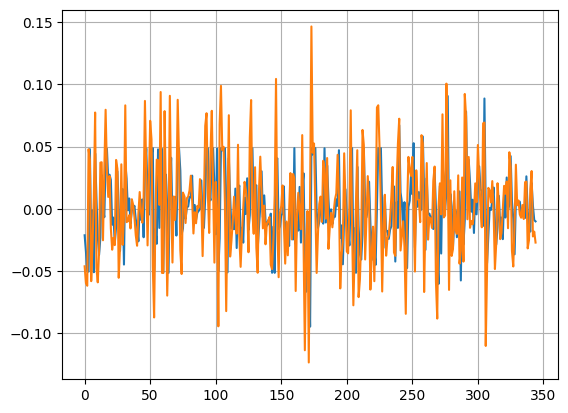

In [34]:
predictions = []
for t in range(len(y_test)):
    yhat = X_test[t]
    error = y_test[t] - yhat

    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]

    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    print('predicted=%f -> expected=%f' % (yhat, y_test[t]))

rmse = sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE: %.3f' % rmse)

plt.plot(y_test)
plt.plot(predictions)
plt.grid()
plt.show()

## **MA model**

In [35]:
X = data['Close']
df = pd.concat([X.shift(1), X.shift(2), X], axis=1)
df.columns = ['t-1', 't-2', 't']
df.dropna(inplace=True)

X = df.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

predictions = [x for x in test_X]
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)
print(residuals.head())

Test RMSE: 1.391
      0
0 -0.10
1  0.30
2  0.30
3  0.15
4  0.00


## **Back test- walk forward over time steps in test**

predicted error=-0.048450 <-> actual error=0.013229
predicted error=-0.009478 <-> actual error=0.015863
predicted error=-0.011367 <-> actual error=0.000079
predicted error=-0.000049 <-> actual error=-0.098317
predicted error=0.070505 <-> actual error=0.079201
predicted error=-0.056782 <-> actual error=-0.030001
predicted error=0.021519 <-> actual error=0.049620
predicted error=-0.035572 <-> actual error=-0.095402
predicted error=0.068415 <-> actual error=0.035587
predicted error=-0.025510 <-> actual error=0.030733
predicted error=-0.022029 <-> actual error=0.015182
predicted error=-0.010879 <-> actual error=-0.013846
predicted error=0.009936 <-> actual error=-0.050322
predicted error=0.036090 <-> actual error=0.025836
predicted error=-0.018518 <-> actual error=0.008056
predicted error=-0.005768 <-> actual error=-0.043757
predicted error=0.031384 <-> actual error=-0.011130
predicted error=0.007989 <-> actual error=0.024929
predicted error=-0.017867 <-> actual error=-0.004189
predicted e

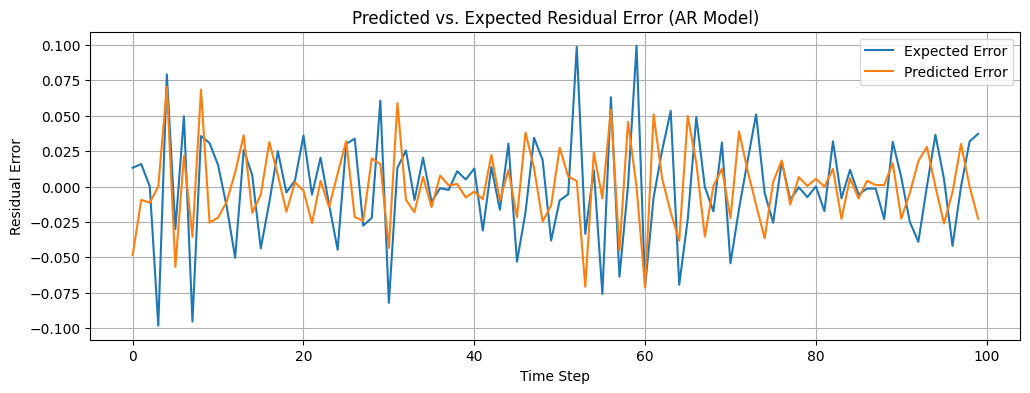

In [36]:
history = train_resid[len(train_resid)-window:]
predictions = list()
expected_error = list()

for t in range(len(y_test)):
    yhat = X_test[t]
    error = y_test[t] - yhat
    expected_error.append(error)

    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * history[window - 1 - d]

    predictions.append(pred_error)

    history = np.append(history, error)
    history = history[1:]
    print('predicted error=%f <-> actual error=%f' % (pred_error, error))

plt.figure(figsize=(12, 4))
plt.plot(expected_error[:100], label='Expected Error')
plt.plot(predictions[:100], label='Predicted Error')
plt.title('Predicted vs. Expected Residual Error (AR Model)')
plt.xlabel('Time Step')
plt.ylabel('Residual Error')
plt.legend()
plt.grid()
plt.show()

## **Predictions with Model of Residuals**

predicted=-0.082897, expected=-0.021218
predicted=-0.059788, expected=-0.034447
predicted=-0.061755, expected=-0.050310
predicted=0.047880, expected=-0.050388
predicted=0.039233, expected=0.047928
predicted=-0.058054, expected=-0.031272
predicted=-0.029372, expected=-0.001271
predicted=0.008938, expected=-0.050892
predicted=0.077338, expected=0.044510
predicted=-0.047319, expected=0.008923
predicted=-0.059021, expected=-0.021810
predicted=-0.034025, expected=-0.036992
predicted=0.037112, expected=-0.023146
predicted=0.037430, expected=0.027176
predicted=-0.025234, expected=0.001340
predicted=0.031273, expected=-0.006716
predicted=0.079555, expected=0.037041
predicted=0.031231, expected=0.048172
predicted=0.009564, expected=0.023243
predicted=0.026268, expected=0.027432
predicted=-0.015710, expected=0.023257
predicted=-0.032802, expected=-0.012724
predicted=-0.023228, expected=-0.007009
predicted=-0.029129, expected=-0.027334
predicted=0.039269, expected=-0.014563
predicted=0.032037, ex

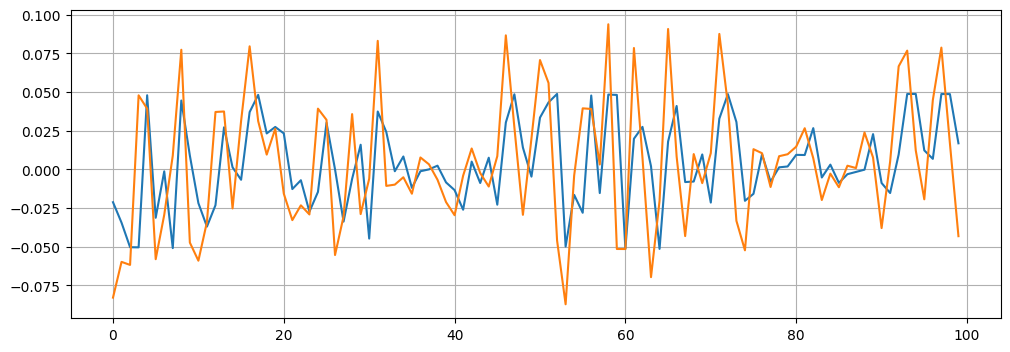

In [37]:
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(y_test)):
    yhat = X_test[t]
    error = y_test[t] - yhat

    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]

    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    print('predicted=%f, expected=%f' % (yhat, y_test[t]))

rmse = sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE: %.3f' % rmse)

plt.figure(figsize=(12, 4))
plt.plot(y_test[:100])
plt.plot(predictions[:100])
plt.grid()
plt.show()

### **Residuals stats**

In [38]:
# persistence model
predictions = [x for x in X_test]
residuals = [y_test[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)
print(residuals.describe())

           0
count 345.00
mean    0.00
std     0.04
min    -0.14
25%    -0.02
50%    -0.00
75%     0.02
max     0.11


### **Residuals plots**

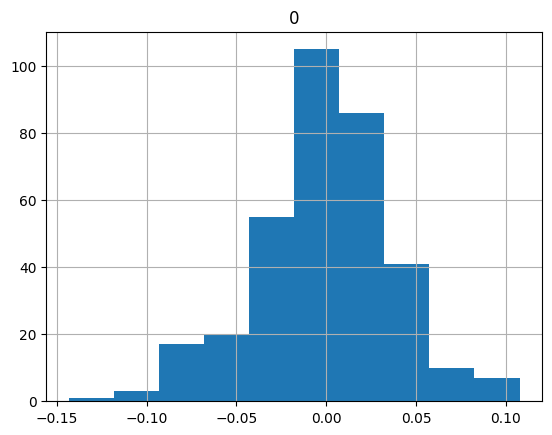

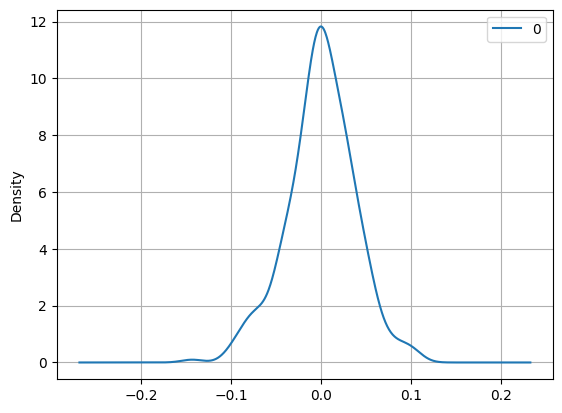

In [39]:
residuals.hist()
plt.show()

residuals.plot(kind='kde')
plt.grid()
plt.show()

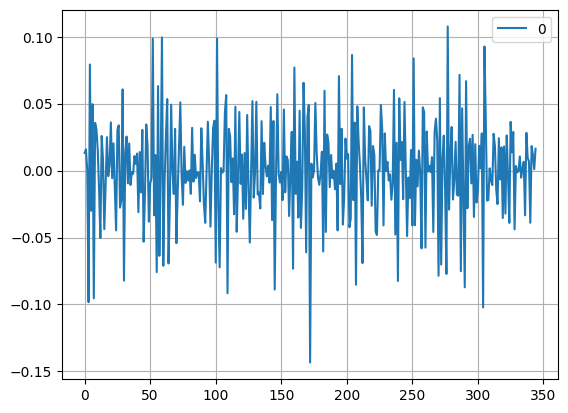

In [40]:
residuals.plot()
plt.grid()
plt.show()

## **ACF & PACF on original data**

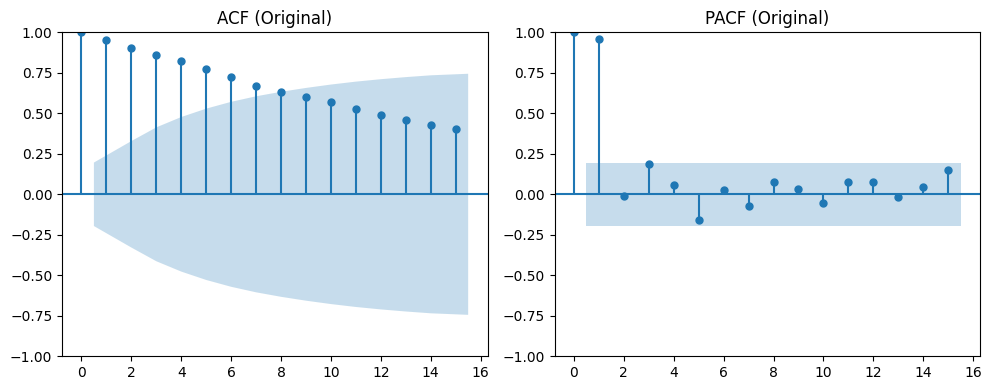

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
plot_acf(data['Close'][:100], lags=15, title='ACF (Original)', ax=ax1)
plot_pacf(data['Close'][:100], lags=15, title='PACF (Original)', method='ols', ax=ax2)
plt.tight_layout()
plt.show()

- ACF shows gradual decay (high correlation at early lags that persists), indicating non-stationarity, trend or unit root is present in the data.
- The PACF has a significant spike only at lag 1, then drops close to zero. Suggests an AR(1) component (autoregressive term of order 1).

No Significant Lags Beyond 1:

No other lags exceed the confidence interval (blue band).

## **ACF and PACF of differenced data**

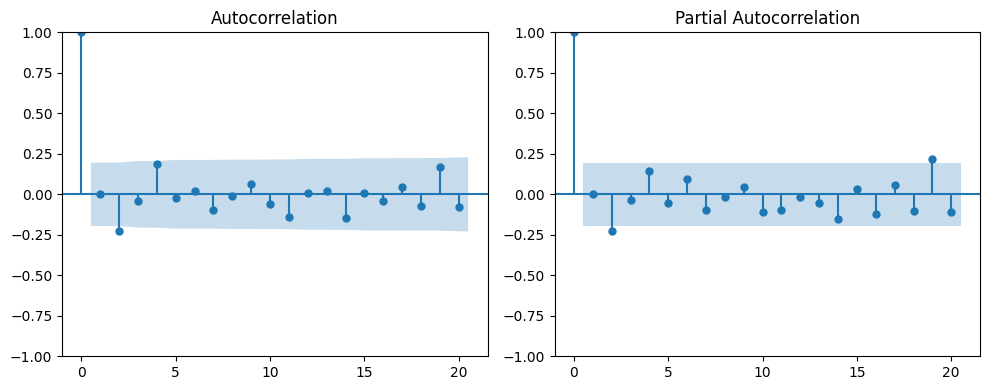

In [42]:
X = np.log(data['Close']).diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
plot_acf(X[:100], lags=20, ax=ax1)
plot_pacf(X[:100], lags=20, ax=ax2, method='ols')
plt.tight_layout()
plt.show()

## **Grid search with AIC/BIC**

In [43]:
p = d = q = range(0, 5)
pdq = list(itertools.product(p, d, q))

best_aic = float("inf")
for order in pdq:
    try:
        model = ARIMA(data['Close'], order=order)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
    except:
        continue

print(f"Best ARIMA{best_order} AIC:{best_aic:.2f}")

Best ARIMA(4, 1, 4) AIC:4255.12


## **ARIMA (4,1,4)**

In [45]:
X = data['Close'].values
X = X.astype('float32')

train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:]

model = ARIMA(train, order=(4,1,3)).fit()
predictions = model.forecast(steps=len(test))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
print(residuals.describe())

Test RMSE: 19.129
           0
count 346.00
mean   15.23
std    11.59
min    -7.76
25%     8.51
50%    14.28
75%    22.73
max    40.63


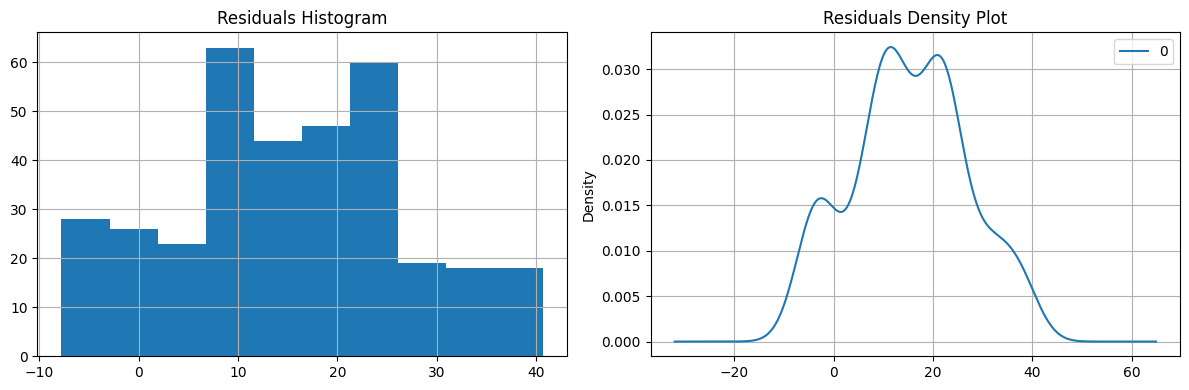

In [46]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
residuals.hist(ax=plt.gca())
plt.title('Residuals Histogram')

plt.subplot(1, 2, 2)
residuals.plot(kind='kde', ax=plt.gca())
plt.title('Residuals Density Plot')
plt.grid(True)

plt.tight_layout()
plt.show()

## **bias-correct predictions using mean value**

**We will use the information from previous model to bias-correct predictions by adding the mean residual error of 15.23 to each forecast made.**

RMSE: 15.317
           0
count 346.00
mean  -15.22
std     1.71
min   -20.22
25%   -16.23
50%   -15.38
75%   -14.23
max    -8.81


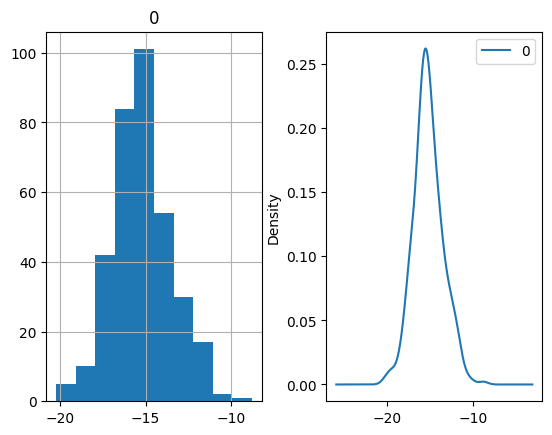

In [47]:
X = data['Close'].values
X = X.astype('float32')
train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:]

history = [x for x in train]
predictions = list()
bias = 15.23
for i in range(len(test)):
    model = ARIMA(history, order=(4,1,3)).fit()
    yhat = bias + float(model.forecast()[0])
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)

rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
print(residuals.describe())

plt.figure()
plt.subplot(121)
residuals.hist(ax=plt.gca())
plt.subplot(122)
residuals.plot(kind='kde', ax=plt.gca())
plt.show()